In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import re
import nltk
import itertools
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from string import punctuation
from nltk import FreqDist

from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')

!pip3 install ftfy
import ftfy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for ftfy: filename=ftfy-5.6-cp36-none-any.whl size=44553 sha256=93015052315d98da71d62aaf9e57a3b837e2af2d4b919d3a66a6d1ec549a972e
  Stored in directory: /root/.cache/pip/wheels/43/34/ce/cbb38d71543c408de56f3c5e26ce8ba495a0fa5a28eaaf1046
Successfully built ftfy


In [ ]:
#arquivo = pd.read_excel('drive/My Drive/lista_produtos.xlsx', usecols='c')

arquivo2 = pd.read_excel('drive/My Drive/Residencia/lista_produtos.xlsx', usecols='c,d')

arquivo2 = arquivo2[arquivo2['NCM'].apply(lambda row: str(row).startswith(("2710","3004")) == False)]

#arquivo2.to_excel(r'drive/My Drive/lista_produtos2.xlsx')

##Mapa de Palavras para filtrar excel

In [ ]:
#import collections
#collections.Counter(arquivo2['NCM'].values.tolist()).most_common(20)

In [ ]:
descricoes = arquivo2.values.tolist()
flat_list = [sublist[0] for sublist in descricoes]
text = ' '.join(flat_list).upper()

text = ftfy.fix_text(text)
tokens = word_tokenize(text)

In [ ]:
okay_items = [re.search('[A-Z]{4,}', token).group() for token in tokens if re.search('[A-Z]{4,}', token)] #DIELSEL-50-1 

In [ ]:
freq = FreqDist(okay_items)
freq.most_common(10)
#freq.plot(20, cumulative=False);

[('TIPO', 2610),
 ('CARNE', 2579),
 ('PARA', 2516),
 ('LOTE', 1906),
 ('PAPEL', 1855),
 ('NACIONAL', 1778),
 ('LEITE', 1742),
 ('MARCA', 1725),
 ('AGUA', 1695),
 ('POLPA', 1687)]

In [ ]:
nltk.download('stopwords')

pt_stopwords = set(nltk.corpus.stopwords.words("portuguese"))

pt_stopwords.add('COMUM')
pt_stopwords.add('BRANCO')
pt_stopwords.add('TIPO')
pt_stopwords.add('PARA')
pt_stopwords.add('LOTE')
pt_stopwords.add('NACIONAL')
pt_stopwords.add('MARCA')
pt_stopwords.add('FILTRO')
pt_stopwords.add('ENDERECO')
pt_stopwords.add('NATURA')
pt_stopwords.add('EMBALAGEM')
pt_stopwords.add('VERDE')
pt_stopwords.add('ESTRELA')
pt_stopwords.add('GTIN')
pt_stopwords.add('FRUTA')
pt_stopwords.add('BRANCA')

remov_stopwords =  [token for token in okay_items if token not in pt_stopwords]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
freq = FreqDist(remov_stopwords)
freq.most_common(20)
#freq.plot(20, cumulative=False)

[('CARNE', 2579),
 ('PAPEL', 1855),
 ('LEITE', 1742),
 ('AGUA', 1695),
 ('POLPA', 1687),
 ('BOVINA', 1621),
 ('BISCOITO', 1409),
 ('MILHO', 1222),
 ('FRANGO', 1207),
 ('OLEO', 1206),
 ('ARROZ', 1197),
 ('TOMATE', 1084),
 ('CABO', 1037),
 ('DOCE', 1020),
 ('SACO', 955),
 ('BATATA', 939),
 ('LAMPADA', 889),
 ('PARAFUSO', 880),
 ('SOJA', 874),
 ('CEBOLA', 864)]

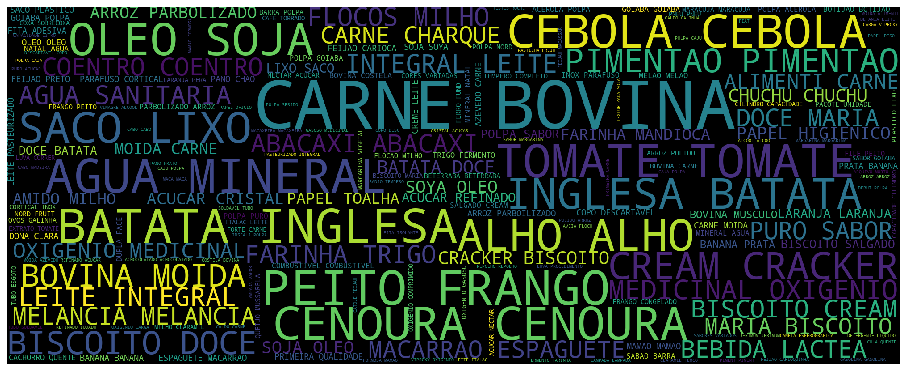

In [ ]:
separador = " "
t = separador.join(remov_stopwords)

wordcloud = WordCloud(max_font_size=150, width = 2000, height = 800).generate(t)
plt.figure(figsize=(16,11))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
'''
arquivo['xProd'].str.upper() 

arquivo = arquivo[arquivo['xProd'].str.contains("GASOLINA|AGUA|DIESEL")]

arquivo.to_excel(r'drive/My Drive/lista_produtos_filtrado.xlsx')
'''

In [ ]:
flat_list = [element.upper() for element in flat_list]

tokenized = map(nltk.tokenize.word_tokenize, flat_list)

to_remov =['SEM', 'GTIN', 'MARCA', 'III', 'NBR']
tokenized2 =[]

for descricao in list(tokenized):
  for token in descricao:
    if re.search('[A-Z]{3,}', str(token)) == None:
      to_remov.append(token)
  
  descricao = [x for x in descricao if x not in to_remov and pt_stopwords]
  if len(descricao) > 0:            
    tokenized2.append(descricao)

In [ ]:
# https://datascience.stackexchange.com/questions/46545/how-to-use-bigrams-for-a-text-of-sentences

def ngrams_wrapper(sent):
    return list(nltk.ngrams(sent, 2))

bigrams = map(ngrams_wrapper, tokenized2)

bigram = list(itertools.chain.from_iterable(bigrams))

freq_dist = nltk.FreqDist(bigram)
freq_dist.most_common(40)
#prob_dist = nltk.MLEProbDist(freq_dist)

[(('CARNE', 'BOVINA'), 1461),
 (('POLPA', 'FRUTA'), 1001),
 (('PEITO', 'FRANGO'), 641),
 (('AGUA', 'MINERAL'), 617),
 (('BATATA', 'INGLESA'), 590),
 (('OLEO', 'SOJA'), 541),
 (('CREAM', 'CRACKER'), 458),
 (('CEBOLA', 'BRANCA'), 449),
 (('EMBALAGEM', 'COM'), 434),
 (('BISCOITO', 'DOCE'), 394),
 (('BOVINA', 'MOIDA'), 382),
 (('FLOCOS', 'MILHO'), 323),
 (('AGUA', 'SANITARIA'), 321),
 (('FILTRO', 'OLEO'), 316),
 (('FILTRO', 'COMBUSTIVEL'), 303),
 (('FARINHA', 'TRIGO'), 302),
 (('LEITE', 'INTEGRAL'), 301),
 (('SAL', 'REFINADO'), 297),
 (('PURO', 'SABOR'), 288),
 (('BEBIDA', 'LACTEA'), 284),
 (('CARNE', 'CHARQUE'), 273),
 (('NATURA', 'NACIONAL'), 268),
 (('SACO', 'LIXO'), 265),
 (('TUBO', 'PVC'), 264),
 (('OXIGENIO', 'MEDICINAL'), 264),
 (('BISCOITO', 'CREAM'), 258),
 (('BATATA', 'DOCE'), 255),
 (('PARA', 'LIXO'), 247),
 (('PIMENTAO', 'VERDE'), 228),
 (('PAPEL', 'HIGIENICO'), 226),
 (('ACUCAR', 'CRISTAL'), 226),
 (('AMIDO', 'MILHO'), 222),
 (('PAPEL', 'TOALHA'), 217),
 (('COM', 'UNIDADES'), 

## Classificadores 


###Pré-processamento

In [ ]:
df = pd.read_excel(r'/content/drive/My Drive/Residencia/lista_produtos_filtrado3.xlsx')

classes = df['Classe'].astype('str')

descricoes = df['xProd'].astype('str')

print(classes.value_counts())

POLPA       1578
BISCOITO    1483
False       1390
LEITE       1137
AGUA         783
Name: Classe, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_classes = encoder.fit_transform(classes)

0 - agua
1 - Biscoito
2 - False
3 - leite
4 - polpa

In [ ]:
# numeros em geral
processed = descricoes.str.replace(r'\d+(\.\d+)?', 'num')

# pontuação
processed = processed.str.replace(r'[^\w\d\s]', '')

# coloca tudo em maiusculo
processed = processed.str.upper()

descricoes = [ftfy.fix_text(descricao) for descricao in processed.values]

In [ ]:
'''
Stopwords
'''
nltk.download('stopwords')

pt_stopwords = set(nltk.corpus.stopwords.words("portuguese"))

processed = list(map(lambda x: ' '.join(term for term in x.split() if term not in pt_stopwords), descricoes))

'''
Steeming
'''
nltk.download('rslp')

stemmer = nltk.stem.RSLPStemmer()

processed = list(map(lambda x: ' '.join(stemmer.stem(term) for term in x.split()), processed))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


###Obtenção de Características

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

all_words = []

for message in processed:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

print('Total de palavras: {}'.format(len(all_words)))
print('Mais comuns: {}'.format(all_words.most_common(5)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Total de palavras: 1042
Mais comuns: [('de', 2090), ('polp', 1663), ('leit', 1649), ('agu', 1536), ('numg', 1417)]


In [ ]:
#determina numero de features = 500
word_features = list(all_words.keys())[:1500]

In [ ]:
word_features

['a',
 'abacax',
 'abob',
 'acentu',
 'acerol',
 'acion',
 'acond',
 'acondicion',
 'acuc',
 'adapt',
 'adcion',
 'adi',
 'adicion',
 'adit',
 'aer',
 'af',
 'agral',
 'agu',
 'agual',
 'aguarasagu',
 'aguarrasnumnum',
 'aguarraz',
 'aguas',
 'alavanc',
 'alic',
 'alicat',
 'alimentaca',
 'almoc',
 'alpin',
 'alt',
 'altern',
 'alumini',
 'alvej',
 'aman',
 'amanc',
 'amant',
 'amanteig',
 'amarel',
 'amig',
 'anel',
 'anim',
 'antiembac',
 'antoni',
 'ao',
 'aplic',
 'apresent',
 'apresentaca',
 'aqualux',
 'aquamax',
 'aquarel',
 'are',
 'arrefec',
 'arroz',
 'asfal',
 'ate',
 'aur',
 'avel',
 'avent',
 'azul',
 'b',
 'bab',
 'baby',
 'bagu',
 'baix',
 'bal',
 'bala',
 'bald',
 'balducc',
 'bambin',
 'banan',
 'bar',
 'barr',
 'bas',
 'bat',
 'beb',
 'bet',
 'betan',
 'bethan',
 'bfnum',
 'bi',
 'bic',
 'bidestil',
 'bio',
 'bisc',
 'biscmaizen',
 'biscoit',
 'biscrosc',
 'bivolt',
 'boi',
 'bol',
 'bolac',
 'bolach',
 'bolosbiscoitostorradasfrut',
 'bom',
 'bomb',
 'bon',
 'borrach'

In [ ]:
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

In [ ]:
produtos = list(zip(processed, encoded_classes))

seed = 1
np.random.seed = seed
np.random.shuffle(produtos)

featuresets = [(find_features(text), label) for (text, label) in produtos]

###Modelos de classificações

In [ ]:
from sklearn import model_selection

training, testing = model_selection.train_test_split(featuresets, test_size = 0.3, random_state=seed)

print("Treino:", len(training))
print("Teste:", len(testing))

Treino: 4459
Teste: 1912


In [ ]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, classification_report

names = ["K Nearest Neighbors", "Decision Tree", "Naive Bayes", "SVM Linear"]

#knn n-neighbors default = 5

classifiers = [KNeighborsClassifier(), 
              DecisionTreeClassifier(),
              MultinomialNB(),
              SVC(kernel = 'linear')
              ]

models = zip(names, classifiers)

txt_features, labels = zip(*testing)

for name, model in models:
    if name == 'K Nearest Neighbors':
        nltk_model = SklearnClassifier(model)
        nltk_model.train(training)
        prediction1 = nltk_model.classify_many(txt_features)
        real1 = labels
    elif name == 'Decision Tree':
        nltk_model = SklearnClassifier(model)
        nltk_model.train(training)
        prediction2 = nltk_model.classify_many(txt_features)
        real2 = labels
    elif name == 'Naive Bayes':
        nltk_model = SklearnClassifier(model)
        nltk_model.train(training)
        prediction3 = nltk_model.classify_many(txt_features)
        real3 = labels
    else:
        nltk_model = SklearnClassifier(model)
        nltk_model.train(training)
        prediction4 = nltk_model.classify_many(txt_features)
        real4 = labels
    
    accuracy = nltk.classify.accuracy(nltk_model, testing)
    #results.append(round(accuracy,4))
    print("{} Accuracy: {}".format(name, accuracy))

K Nearest Neighbors Accuracy: 0.9670502092050209
Decision Tree Accuracy: 0.9858786610878661
Naive Bayes Accuracy: 0.9665271966527197
SVM Linear Accuracy: 0.9827405857740585


In [ ]:
#para KNN
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {‘n_neighbors’: np.arange(1, 200)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

In [ ]:
def metodos(training, testing):

  names = ["K Nearest Neighbors", "Decision Tree", "Naive Bayes", "SVM Linear"]

  #knn n-neighbors default = 5

  classifiers = [KNeighborsClassifier(), 
                DecisionTreeClassifier(),
                MultinomialNB(),
                SVC(kernel = 'linear')
                ]

  models = zip(names, classifiers)

  txt_features, labels = zip(*testing)

  results = []

  for name, model in models:
      if name == 'K Nearest Neighbors':
          nltk_model = SklearnClassifier(model)
          nltk_model.train(training)
          prediction1 = nltk_model.classify_many(txt_features)
          real1 = labels
      elif name == 'Decision Tree':
          nltk_model = SklearnClassifier(model)
          nltk_model.train(training)
          prediction2 = nltk_model.classify_many(txt_features)
          real2 = labels
      elif name == 'Naive Bayes':
          nltk_model = SklearnClassifier(model)
          nltk_model.train(training)
          prediction3 = nltk_model.classify_many(txt_features)
          real3 = labels
      else:
          nltk_model = SklearnClassifier(model)
          nltk_model.train(training)
          prediction4 = nltk_model.classify_many(txt_features)
          real4 = labels
      
      accuracy = nltk.classify.accuracy(nltk_model, testing)
      results.append(round(accuracy,4))
      #print("{} Accuracy: {}".format(name, accuracy))
    
  return(results)

#### K-Fold

In [ ]:
from random import shuffle
k = 10
subset_size = round(len(featuresets) / k)
shuffle(featuresets)
subsets = [featuresets[x:x+subset_size] for x in range(0, len(featuresets), subset_size)]

resultado_total = []

for i in subsets[0:-1]:
  training, testing = model_selection.train_test_split(i, test_size = 0.3, random_state=seed)
  resultado = metodos(training, testing)
  resultado_total.append(resultado)

df_results = pd.DataFrame(resultado_total, columns = ["K Nearest Neighbors", "Decision Tree", "Naive Bayes", "SVM Linear"])

df_results.head()

10


,K Nearest Neighbors,Decision Tree,Naive Bayes,SVM Linear
0,0.9271,0.9583,0.9635,0.9740
1,0.9375,0.9271,0.9427,0.9479
2,0.9375,0.9479,0.9479,0.9479
3,0.9479,0.9635,0.9427,0.9740
4,0.9427,0.9844,0.9531,0.9896


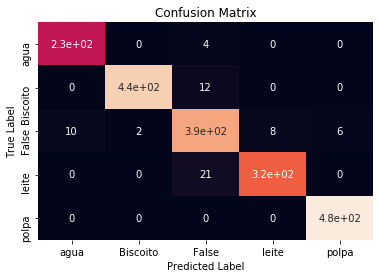

In [ ]:
import seaborn as sns

axes = ['agua', 'Biscoito', 'False', 'leite', 'polpa']

#mudar os predictionX para trocar a matriz por modelo
sns.heatmap(confusion_matrix(labels, prediction1), annot=True, cbar=False,  xticklabels= axes, yticklabels=axes)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#KNN
print(classification_report(real1, prediction1, target_names=['agua', 'Biscoito', 'False', 'leite', 'polpa']))

              precision    recall  f1-score   support

        agua       0.96      0.98      0.97       230
    Biscoito       1.00      0.97      0.98       452
       False       0.91      0.94      0.93       418
       leite       0.98      0.94      0.96       336
       polpa       0.99      1.00      0.99       476

    accuracy                           0.97      1912
   macro avg       0.97      0.97      0.97      1912
weighted avg       0.97      0.97      0.97      1912



In [ ]:
#Decision Tree
print(classification_report(real2, prediction2, target_names=['agua', 'Biscoito', 'False', 'leite', 'polpa']))

              precision    recall  f1-score   support

        agua       0.99      0.99      0.99       230
    Biscoito       0.99      0.99      0.99       452
       False       0.98      0.96      0.97       418
       leite       0.97      1.00      0.98       336
       polpa       1.00      1.00      1.00       476

    accuracy                           0.99      1912
   macro avg       0.98      0.99      0.99      1912
weighted avg       0.99      0.99      0.99      1912



In [ ]:
#NB
print(classification_report(real3, prediction3, target_names=['agua', 'Biscoito', 'False', 'leite', 'polpa']))

              precision    recall  f1-score   support

        agua       0.97      0.99      0.98       230
    Biscoito       0.99      0.98      0.99       452
       False       0.97      0.89      0.93       418
       leite       0.91      0.97      0.94       336
       polpa       0.99      1.00      0.99       476

    accuracy                           0.97      1912
   macro avg       0.96      0.97      0.97      1912
weighted avg       0.97      0.97      0.97      1912



In [ ]:
#SVM
print(classification_report(real4, prediction4, target_names=['agua', 'Biscoito', 'False', 'leite', 'polpa']))

              precision    recall  f1-score   support

        agua       0.99      0.99      0.99       230
    Biscoito       1.00      0.98      0.99       452
       False       0.95      0.98      0.96       418
       leite       0.99      0.96      0.97       336
       polpa       0.99      1.00      1.00       476

    accuracy                           0.98      1912
   macro avg       0.98      0.98      0.98      1912
weighted avg       0.98      0.98      0.98      1912

